In [4]:
import numpy as np
import matplotlib.pyplot as plt

## whats in the data
data_train = np.load('species_train.npz')
print('train: ' + str(data_train.files))
data_test = np.load('species_test.npz') #how will we hande pickle data?
print('test: '+ str(data_test.files))
data_extra = np.load('species_train_extra.npz')
print('extra: ' + str(data_extra.files))

data_test = np.load('species_test.npz', allow_pickle=True)
pickled = data_test['allow_pickle'] 


pickled = data_test['allow_pickle']
pickled
type(data_train.files)

train: ['train_locs', 'train_ids', 'taxon_ids', 'taxon_names']
test: ['test_locs', 'test_pos_inds', 'taxon_ids', 'taxon_names', 'allow_pickle']
extra: ['train_locs', 'train_ids', 'taxon_ids', 'taxon_names']


list

# **Data Exploration**

In [7]:
#cleaning the data

#missing values

for x in data_train.files:
    arr = data_train[x]
    print(x)
    print("Size:", arr.size)
    print("len:", len(arr))
    print("Shape:", arr.shape)
    print("Datatype:", arr.dtype)
    print("\n")


train_locs
Size: 544074
len: 272037
Shape: (272037, 2)
Datatype: float32


train_ids
Size: 272037
len: 272037
Shape: (272037,)
Datatype: int32


taxon_ids
Size: 500
len: 500
Shape: (500,)
Datatype: int64


taxon_names
Size: 500
len: 500
Shape: (500,)
Datatype: <U31




In [9]:
train_locs = data_train['train_locs']
train_ids = data_train['train_ids']
taxon_ids = data_train['taxon_ids']
taxon_names = data_train['taxon_names']

#missing values?
nan_train_locs = np.isnan(data_train['train_locs']).any() #check  for nans in floating-point array/float32
print(f'any nans in trainlocs: {nan_train_locs} \n')

invalid_train_ids = np.any(data_train['train_ids']<= 0) #check  for invalid ids e.g. negative or 0 in integers/int32
print(f'any train invalid IDs: {invalid_train_ids} \n')

invalid_taxon_ids = np.any(data_train['taxon_ids']<= 0) #check  for invalid ids e.g. negative or 0 in integers/int64
print(f'any taxon invalid IDs: {invalid_taxon_ids} \n')

missing_taxon_names = np.any(data_train['taxon_names'] == '') or np.any(data_train['taxon_names'] == None)
print(f'any misssing taxon names: {missing_taxon_names}')



any nans in trainlocs: False 

any train invalid IDs: False 

any taxon invalid IDs: False 

any misssing taxon names: False


In [10]:
#split into longitude and latitude

locs = data_train['train_locs']

latitude = locs[:, 0]  # latitude
longitude = locs[:, 1] #longitude

#print(latitude.shape)


import random
species_names = data_train['taxon_names'] 
ten_species = np.random.choice(species_names, 5)

ten_species


array(['Granatina granatina', 'Crypturellus soui', 'Spatula smithii',
       'Gerygone igata', 'Pachyramphus castaneus'], dtype='<U31')

Granatina granatina done
Crypturellus soui done
Spatula smithii done
Gerygone igata done
Pachyramphus castaneus done


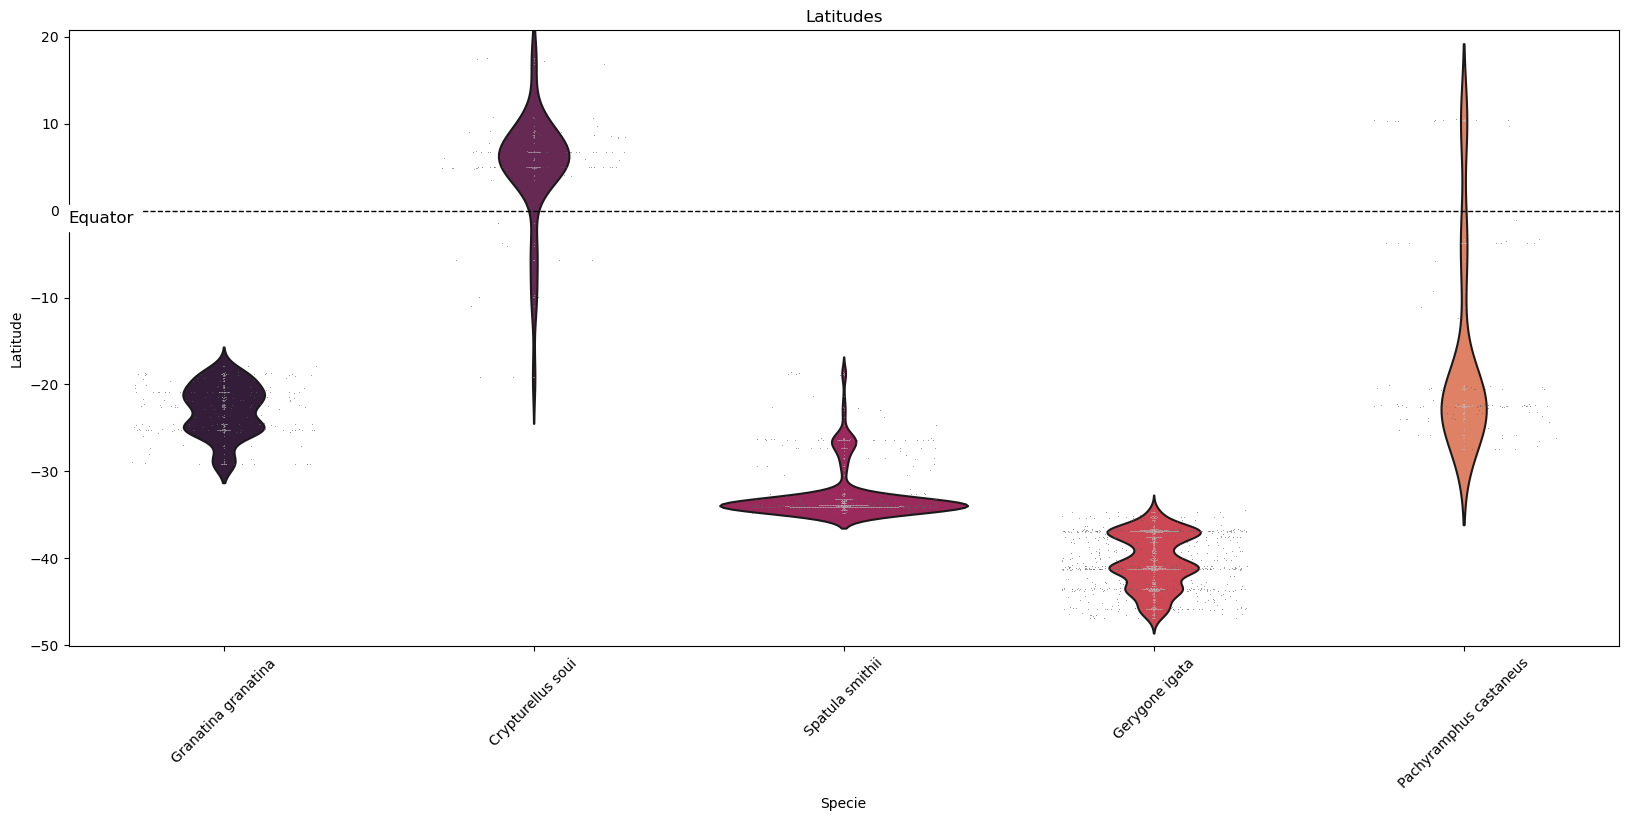

In [13]:
#LATITUDE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.title('Violin Plot showing specie distribution acros different latitudes')


data_points = []
labels = []

for name in ten_species:
    index_of_name = np.where(taxon_names == name)[0]
    taxon_id = taxon_ids[index_of_name][0]
    indexes_of_locations = np.where(train_ids == taxon_id)[0]
    present_latitudes = latitude[indexes_of_locations]
    
    data_points.extend(present_latitudes)
    labels.extend([name] * len(present_latitudes))
    print(f'{name} done')

sns.set_palette("rocket")
sns.violinplot(x=labels, y=data_points, inner=None)

sns.stripplot(x=labels, y=data_points, color='gray', size=0.5, jitter=0.3)
sns.swarmplot(x=labels, y=data_points, color='white', size=0.5, alpha=0.7, dodge=True)

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.text(x=-0.5, y=0, s="Equator", color="black", ha="left", va="top", fontsize=12, backgroundcolor="white")



plt.title('Latitudes')
plt.xlabel('Specie')
plt.ylabel('Latitude')
plt.xticks(rotation=45, fontsize=10)            

plt.show()

Granatina granatina done
Crypturellus soui done
Spatula smithii done
Gerygone igata done
Pachyramphus castaneus done


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 18.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


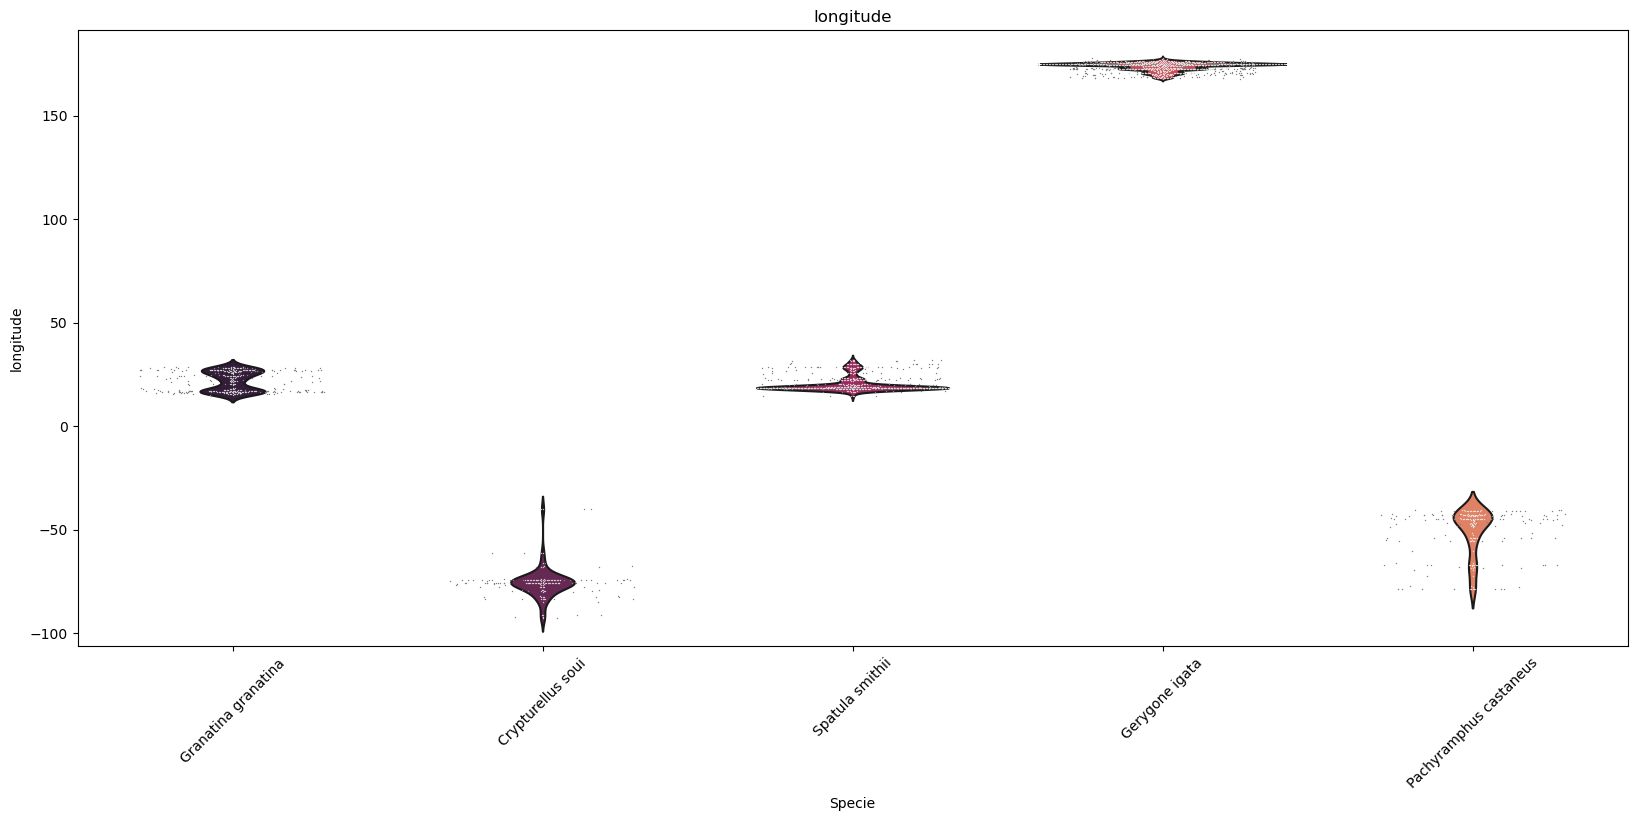

In [12]:
###############LONGITUDE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.title('Violin Plot showing specie distribution acros different longitude')


data_points = []
labels = []

for name in ten_species:
    index_of_name = np.where(taxon_names == name)[0]
    taxon_id = taxon_ids[index_of_name][0]
    indexes_of_locations = np.where(train_ids == taxon_id)[0]
    present_longitude = longitude[indexes_of_locations]
    
    data_points.extend(present_longitude)
    labels.extend([name] * len(present_longitude))
    print(f'{name} done')

sns.set_palette("rocket")
sns.violinplot(x=labels, y=data_points, inner=None)

sns.stripplot(x=labels, y=data_points, color='gray', size=1, jitter=0.3)
sns.swarmplot(x=labels, y=data_points, color='white', size=1, alpha=0.7, dodge=True)


plt.title('longitude')
plt.xlabel('Specie')
plt.ylabel('longitude')
plt.xticks(rotation=45, fontsize=10)            

plt.show()

# **Clusters**

In [73]:
##########try different clustering methods

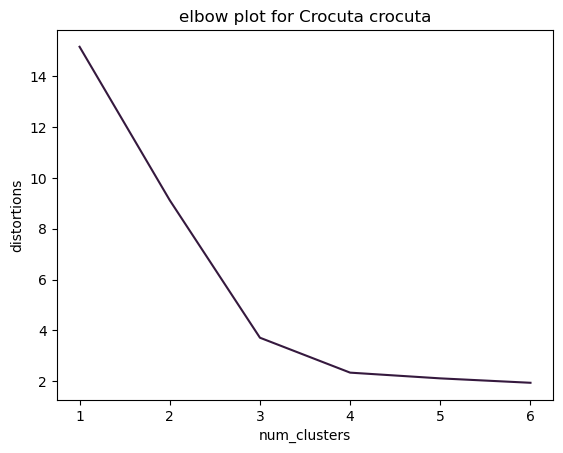

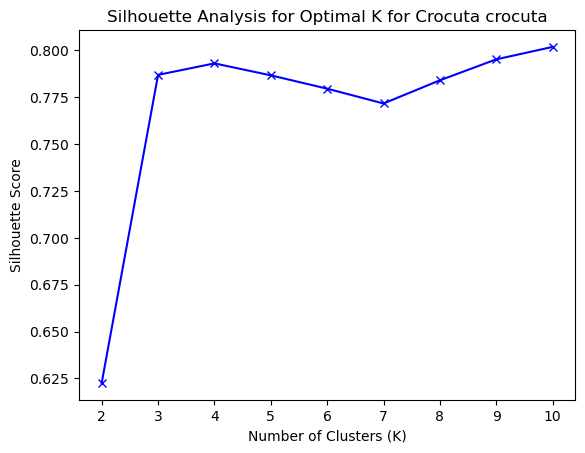

Optimal K (number of clusters): 10


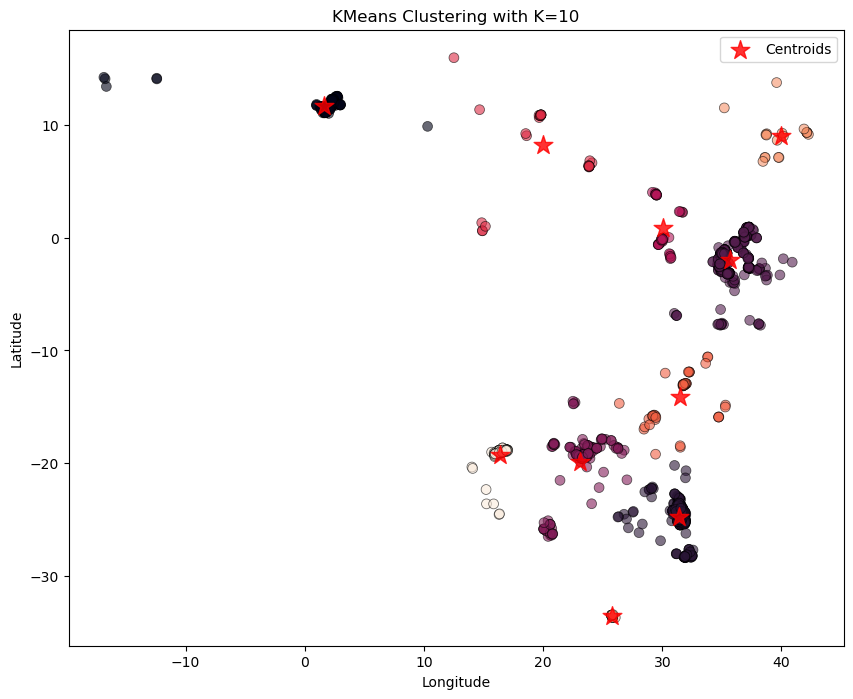

In [44]:
#option 1 - one specie how many clusters?

import pandas as pd
from scipy.cluster.vq import whiten
from scipy.stats import zscore
from scipy.cluster.vq import vq, kmeans

#name= np.random.choice(species_names, 1)
name = 'Crocuta crocuta'

index_of_name = np.where(taxon_names == name)[0]
taxon_id = taxon_ids[index_of_name][0]
indexes_of_locations = np.where(train_ids == taxon_id)[0]
specie_locations = locs[indexes_of_locations]


############################ELBOW######################################
distortions = []
num_clusters = range(1, 7)
os.environ['OMP_NUM_THREADS'] = '1'  # Suppress the warning

for i in num_clusters:
    cluster_centers, distortion = kmeans(specie_locations, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.title(f'elbow plot for {name}')
plt.show()

################################silhouette########################
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

os.environ['OMP_NUM_THREADS'] = '1'  # Suppress the warning

dict_clusters = {}

range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(specie_locations)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(specie_locations, cluster_labels))


optimal_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]


plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Analysis for Optimal K for {name}')
plt.show()

print(f"Optimal K (number of clusters): {optimal_k}")  

###############################PLOT############################

kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(specie_locations)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
sns.set_palette("rocket")
sns.scatterplot(x=specie_locations[:, 1], y=specie_locations[:, 0],  
                hue=cluster_labels, s=50, alpha=0.6, edgecolor='black', palette="rocket", legend=None)

#cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0],  
            c='red', s=200, alpha=0.8, label='Centroids', marker='*')


#plt.xlim(-180, 180)  # Longitude
#plt.ylim(-90, 90)    # Latitude 


plt.title(f'KMeans Clustering with K={optimal_k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()




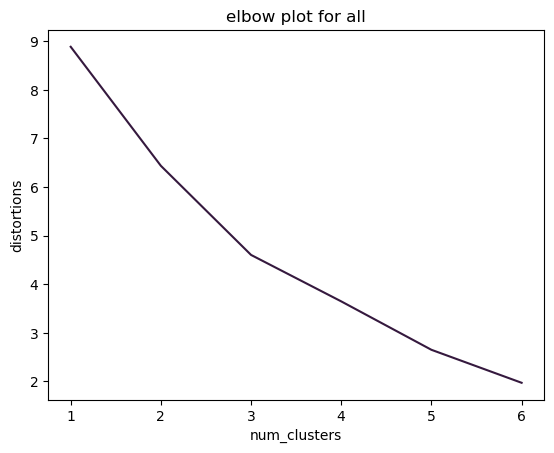

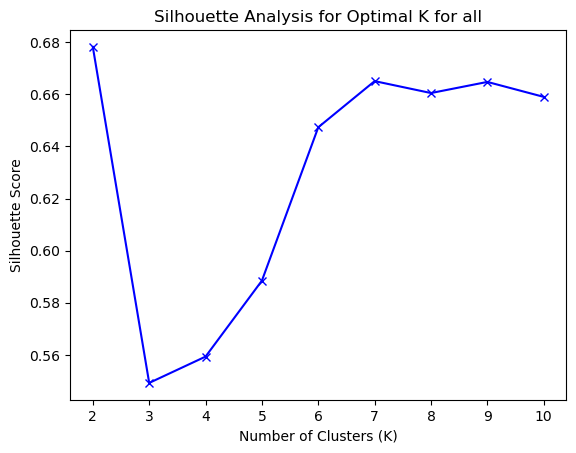

Optimal K (number of clusters): 2


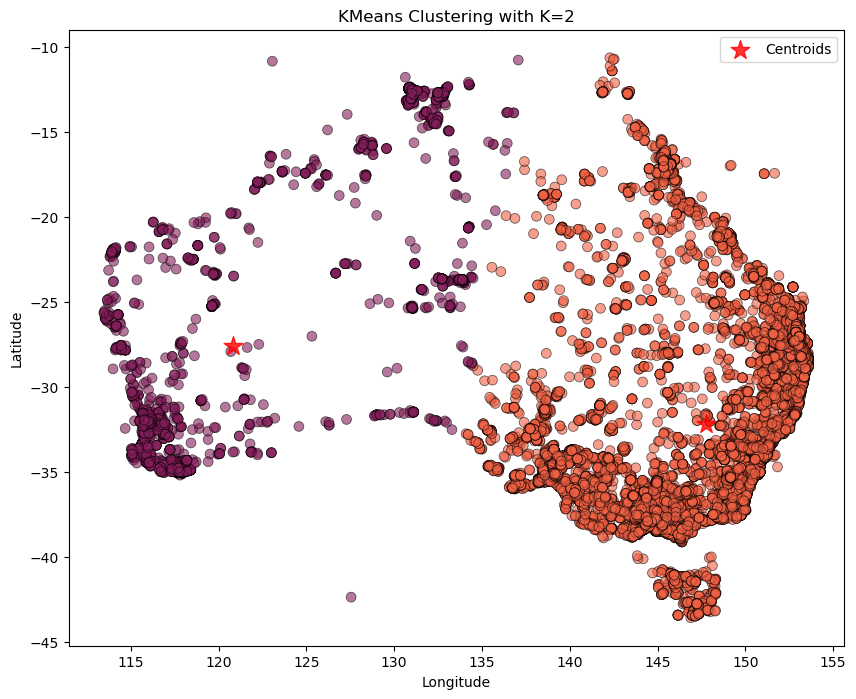

In [59]:
#option 2 - cluster all data what species are in each cluster - my laptop died when i tried so i did only australia instead


import pandas as pd
from scipy.cluster.vq import whiten
from scipy.stats import zscore
from scipy.cluster.vq import vq, kmeans


#Australia
latitude_min, latitude_max = -43.6, -10.6
longitude_min, longitude_max = 113.2, 153.6

australia_indexes = np.where((locs[:, 0] >= latitude_min) & (locs[:, 0] <= latitude_max) &
                             (locs[:, 1] >= longitude_min) & (locs[:, 1] <= longitude_max))[0]

australia_locs = locs[australia_indexes]
australia_ids = train_ids[australia_indexes]

specie_locations = australia_locs
specie_ids = australia_ids

############################ELBOW######################################
distortions = []
num_clusters = range(1, 7)
os.environ['OMP_NUM_THREADS'] = '1'  # Suppress the warning

for i in num_clusters:
    cluster_centers, distortion = kmeans(specie_locations, i)
    distortions.append(distortion)

elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

sns.lineplot(x='num_clusters', y='distortions', data=elbow_plot)
plt.xticks(num_clusters)
plt.title(f'elbow plot for all')
plt.show()

################################silhouette########################
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import os

os.environ['OMP_NUM_THREADS'] = '1'  # Suppress the warning

dict_clusters = {}

range_n_clusters = [ 2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(specie_locations)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(specie_locations, cluster_labels))


optimal_k = range_n_clusters[silhouette_avg.index(max(silhouette_avg))]


plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title(f'Silhouette Analysis for Optimal K for all')
plt.show()

print(f"Optimal K (number of clusters): {optimal_k}")  

###############################PLOT############################

kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(specie_locations)
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_


plt.figure(figsize=(10, 8))
sns.set_palette("rocket")
sns.scatterplot(x=specie_locations[:, 1], y=specie_locations[:, 0],  
                hue=cluster_labels, s=50, alpha=0.6, edgecolor='black', palette="rocket", legend=None)

#cluster centers
plt.scatter(cluster_centers[:, 1], cluster_centers[:, 0],  
            c='red', s=200, alpha=0.8, label='Centroids', marker='*')


#plt.xlim(-180, 180)  # Longitude
#plt.ylim(-90, 90)    # Latitude 


plt.title(f'KMeans Clustering with K={optimal_k}')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()




In [57]:
len(set(australia_ids))

78

                 latitude   longitude
cluster_labels                       
0              -37.265022  142.662109
1              -31.539974  151.112305
Species distribution per cluster:
cluster_labels  id    
0               13510      932
                42888     1123
                204497     842
1               13510     1068
                42888      877
                204497    1157
dtype: int64



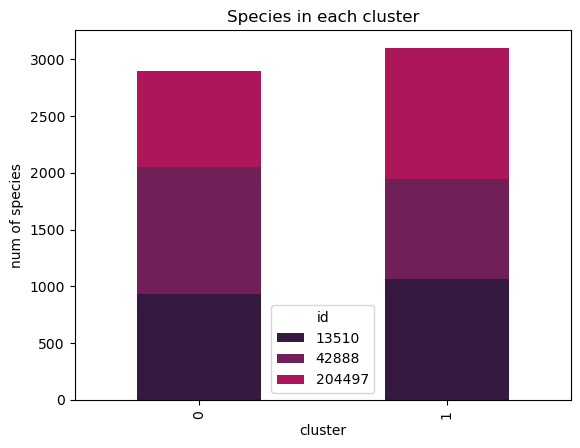

In [72]:
import pandas as pd
from collections import Counter
from scipy.cluster.vq import kmeans, vq
import matplotlib.pyplot as plt


top_3_ids = [item for item, count in Counter(specie_ids).most_common(3)]

df = pd.DataFrame({
    'latitude': specie_locations[:, 0],
    'longitude': specie_locations[:, 1],
    'id': specie_ids
})


top_species_df = df[df['id'].isin(top_3_ids)].copy()

cluster_centers, _ = kmeans(top_species_df[['latitude', 'longitude']], optimal_k)


top_species_df['cluster_labels'], _ = vq(top_species_df[['latitude', 'longitude']], cluster_centers)


print(top_species_df.groupby('cluster_labels')[['latitude', 'longitude']].mean())

print("Species distribution per cluster:")
print(top_species_df.groupby(['cluster_labels', 'id']).size())
print('')


top_species_df.groupby(['cluster_labels', 'id']).size().unstack().plot(kind='bar', stacked=True)
plt.title("species in each cluster")
plt.xlabel("cluster")
plt.ylabel("num of species")
plt.legend(title="id")
plt.show()
